# importing libraries and reading data 

In [129]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import lux
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
data=pd.read_csv("iris.csv")


#  Extracting the useful data

In [130]:
data=data.iloc[:, [ 1, 2, 3,4]]

# Finding the optimum number of clusters for k-means classification

In [131]:
sse=[]
for k in range(1,11):
    Kmeans=KMeans(
        init="k-means++",
        n_clusters=k,
        n_init=10,
        max_iter=300)
    Kmeans.fit(data)
    sse.append(Kmeans.inertia_)
    


C:\Users\Farah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


<h2>Here we plot the line graph to observe the "elbow"</h2>

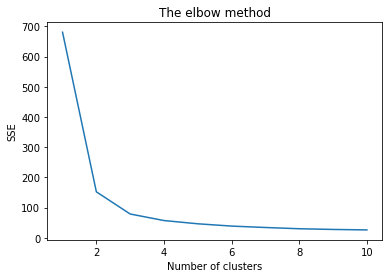

In [132]:
plt.plot(range(1,11),sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

<h4>we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.</h4>

In [147]:
Kmeans=KMeans(
        init="k-means++",
        n_clusters=3,
        n_init=10,
        max_iter=300)
y=Kmeans.fit_predict(data)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [148]:
data=np.array(data)

<h2>Visualising the clusters with their centroids</h2>

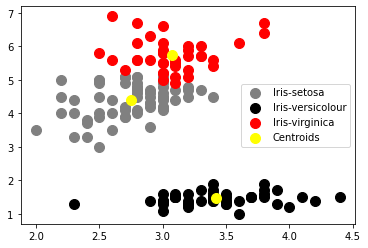

In [155]:
 plt.scatter(data[y==0, 1], data[y==0, 2], 
            s = 100, c = 'gray', label = 'Iris-setosa')
plt.scatter(data[y== 1, 1], data[y== 1, 2], 
            s = 100, c = 'black', label = 'Iris-versicolour')
plt.scatter(data[y== 2, 1], data[y== 2, 2],
            s = 100, c = 'red', label = 'Iris-virginica')
#plotting
plt.scatter(Kmeans.cluster_centers_[:, 1], Kmeans.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
